In [ ]:
pip install serial pyserial

In [1]:
import serial  # библиотека для работы с serial портом
import sys
import numpy as np

In [2]:
def serial_ports():
    # Определение количества и названия COM-портов
    if sys.platform.startswith('win'):
        ports = ['COM%s' % (i + 1) for i in range(20)]
    else:
        raise EnvironmentError('Unsupported platform')
    result = []
    for port in ports:
        try:
            s = serial.Serial(port)
            s.close()
            result.append(port)
        except (OSError, serial.SerialException):
            pass
    return result
list_comports = serial_ports()
def connection_plata():
    # Подключение к плате
    speed = 115200
    com_port = ''
    ArduinoSerial = serial.Serial(com_port, speed, xonxoff=False, timeout = None)  # Установка параметров платы
    return ArduinoSerial
Arduino = connection_plata()
def get_serial_data(send_cmd, cols, rows):
    massive = []
    Arduino.write(send_cmd.encode()) #Отправка данных на ардуино
    for i in range(cols*rows):  # Тут в скобках указать размерность принимаемого массива сейчас 32 на 32.
        data = Arduino.readline()
        data = data.decode('UTF-8')
        massive.append(int(data))
    massive = np.array(massive)
    massive = np.reshape(massive, (-1, cols)) #Для изменения размера масива, поскольку изначально все значения в 1 строку
    #massive = massive.T
    return np.rot90(massive, 2)
print(list_comports)

['COM3']


"start min_fi max_fi min_tetta max_tetta points_fi points_tetta stop_time speed"<br>
"start - команда запуска,<br>
min_fi max_fi - мин/макс угол поворота,<br>
min_tetta max_tetta - мин/макс угол наклона,<br>
points_fi=cols - остановок при повороте,<br>
points_tetta=rows - остановок при наклоне,<br>
stop_time - время остановок,<br>
speed - скорость движения серво 1...10"

In [ ]:
min_fi = 70
max_fi = 110
min_tetta = 60
max_tetta = 100
k = 1
cols = 3
rows = 3
stop_time = 0 #не менее 300-400 иначе не успевает измерить
speed = 8 #желательно 8-9 иначе может не успевать измерить
send_cmd = "start "+str(min_fi)+" "+str(max_fi)+" "+str(min_tetta)+" "+str(max_tetta)+" "+str(cols)+" "+str(rows)+" "+str(stop_time)+" "+str(speed)
lidar_data = get_serial_data(send_cmd, cols, rows)

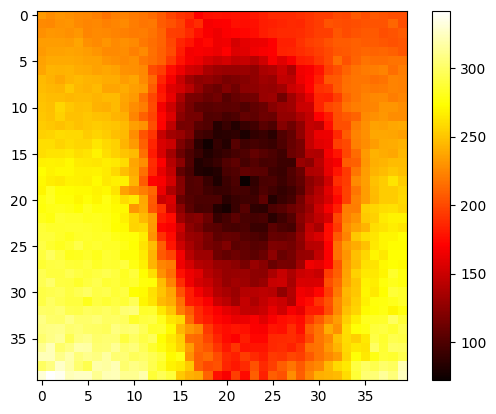

In [8]:
import matplotlib.pyplot as plt

plt.imshow(lidar_data, cmap='hot', interpolation='nearest', )
plt.colorbar()
plt.show()

In [34]:
lidar_data

array([[ 299,  302,  289,  298, 8191,  380,  320,  285],
       [ 275,  272,  264,  261,  281,  278,  273,  270],
       [ 254,  248,  245,  243,  276,  265,  260,  252],
       [ 232,  233,  230,  216,  241,  240,  237,  233]])